In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Image Classification with Convolutional Neural Network***

In [ ]:
#ref: tutorial 7(cifar10)
#ref: https://www.programcreek.com/python/example/105103/torchvision.datasets.MNIST
#initilize a transform
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])
trainset = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
print("Initialize the trainset and testset sucessfully")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Initialize the trainset and testset sucessfully


show training image

tensor(8)


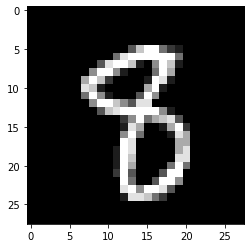

In [ ]:
#issue: requested resize to 32x32x1 (1024 elements in total), but the given tensor has a size of 1x28x28 (784 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 
#therefore the size of tensor is set t0 be 28*28*1
from torch.autograd._functions import Resize
images, labels = next(iter(trainloader))
plt.imshow(images[0].reshape((28,28)), cmap="gray")
print(labels[0])

procedure of convolutional Network(copy from tutorial 7)

In [ ]:
from matplotlib import image
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, 3) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(2, 2, 3)
        self.fc1 = nn.Linear(128, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #my implimentation
        #(32,32,3)->(28,28,6)
        x = F.relu(self.conv1(x))#A convolution layer with 32 kernels of size 3×3,A ReLU activation
        #print("after first conv: ",x.shape)
        x = F.relu(self.conv2(x))#A convolution layer with 64 kernels of size 3×3,A ReLU activation.
        #print("after second conv: ",x.shape)
        x = self.pool(x)#A maxpool layer with kernels of size 2×2
        #print("after mix pool: ",x.shape)
        x = F.relu(self.conv2(x))#A convolution layer with 64 kernels of size 3×3,A ReLU activation.
        #print("after third conv: ",x.shape)
        x = F.relu(self.conv2(x))#A convolution layer with 64 kernels of size 3×3,A ReLU activation.
        #print("after fourth conv: ",x.shape)
        x = x.view(-1,128)#length of feature vector is 32*128 = 4096
        #print("after reshape: ",x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #print("after linear: ",x.shape)
        return x
net = Net()
#Create an instance of the SGD optimizer with a learning rate of 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(12):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print("input shape is: ",inputs.shape)
        #print("labels shape is: ",labels.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("output shape is: ",inputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #print(i)
        if i % 800 == 799:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   800] loss: 0.921
[1,  1600] loss: 0.921
[2,   800] loss: 0.920
[2,  1600] loss: 0.921
[3,   800] loss: 0.920
[3,  1600] loss: 0.920
[4,   800] loss: 0.920
[4,  1600] loss: 0.918
[5,   800] loss: 0.827
[5,  1600] loss: 0.240
[6,   800] loss: 0.125
[6,  1600] loss: 0.103
[7,   800] loss: 0.081
[7,  1600] loss: 0.074
[8,   800] loss: 0.062
[8,  1600] loss: 0.058
[9,   800] loss: 0.051
[9,  1600] loss: 0.048
[10,   800] loss: 0.041
[10,  1600] loss: 0.042
[11,   800] loss: 0.037
[11,  1600] loss: 0.037
[12,   800] loss: 0.033
[12,  1600] loss: 0.032
Finished Training


In [ ]:
#save the trained data into the drive
PATH = './nnresult.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
#load the trained data from the drive
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
#load the test images
dataiter = iter(testloader)
images, labels = dataiter.next()

In [ ]:
outputs = net(images)

In [ ]:
#classify the image use the testset outputs
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % predicted[j]
                              for j in range(4)))

Predicted:  tensor(7) tensor(2) tensor(1) tensor(0)


#***Segmentation***

K-means clustering method implimentation

In [ ]:
#ref: https://www.youtube.com/watch?v=4b5d3muPQmA
#ref: https://github.com/anudruth/McGill-ECSE-415-Computer-Vision/
import random as rand
def kMean_clustering(img, k, numberOfIter):
  result = []#store image for different iteration
  centers = []#initial random centers for KMC
  for _ in range(k):
    centers.append([rand.uniform(0.0, 1.0)*255.0, rand.uniform(0.0, 1.0)*255.0, rand.uniform(0.0, 1.0)*255.0])
  #start the k_mean iteration
  for i in range(numberOfIter):
    #find distance between each pixel to the centers
    dis = np.array([img - theCenter for theCenter in centers])
    #print("disone: ",dis.shape)
    #calculate the norn of the distance result
    dis = np.linalg.norm(dis, axis=-1)
    #print("disone: ",dis.shape)
    #find the minimum distance to the center
    clusters = np.argmin(dis, axis=0)
    result.append(clusters)
    #udpate the center to the mean of the points
    updateCenter = []
    for j in range(k):
      updateCenter.append(np.mean(img[clusters == j],0))
    #print(updateCenter)
    updateCenter = np.array(updateCenter)
    centers = updateCenter
  return result

apply KMC, K=2

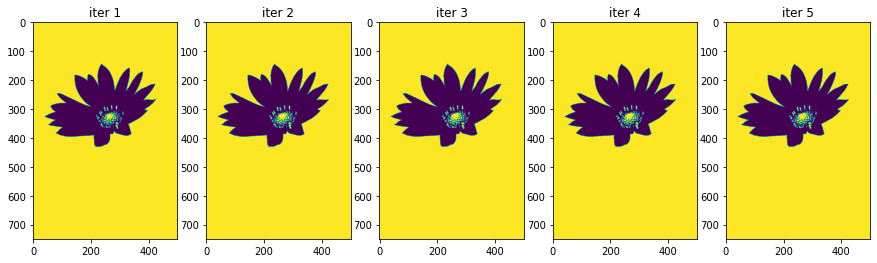

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.imread(imgPath)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#print(img.shape)
result = kMean_clustering(img,2,10)
#disaply first 5
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(result[0])
plt.title("iter 1")
plt.subplot(152), plt.imshow(result[1])
plt.title("iter 2")
plt.subplot(153), plt.imshow(result[2])
plt.title("iter 3")
plt.subplot(154), plt.imshow(result[3])
plt.title("iter 4")
plt.subplot(155), plt.imshow(result[4])
plt.title("iter 5")
plt.show()

final result of segmentation

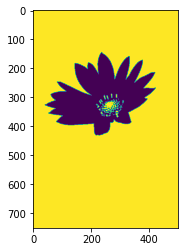

In [ ]:
plt.imshow(result[9])

apply KMC, K=3

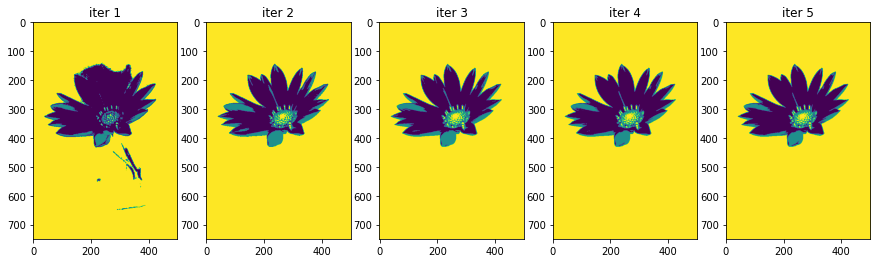

In [ ]:
#imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/aloeR.jpg"
img = cv.imread(imgPath)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
result = kMean_clustering(img,3,10)
#disaply first 5
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(result[0])
plt.title("iter 1")
plt.subplot(152), plt.imshow(result[1])
plt.title("iter 2")
plt.subplot(153), plt.imshow(result[2])
plt.title("iter 3")
plt.subplot(154), plt.imshow(result[3])
plt.title("iter 4")
plt.subplot(155), plt.imshow(result[4])
plt.title("iter 5")
plt.show()

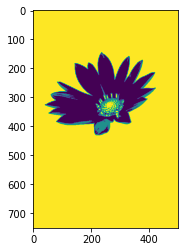

In [ ]:
#last segmentation
plt.imshow(result[9])

in a lot of times, when k = 3, there's no flower shape display in final segmentation. due to the picture majorly only has 2 colors, program cannot find any pixcels that close to the third center, therefore, there's none for third center.

In [ ]:
import random as rand
def convertGreyImgTo3D(img):
  result = []
  for i in range(img.shape[0]):
    col = []
    for j in range(img.shape[1]):
      col.append([img[i][j],img[i][j]])
    result.append(col)
  return np.array(result)
def kMean_clustering_gray(img, k, numberOfIter):
  img = convertGreyImgTo3D(img)
  result = []#store image for different iteration
  centers = []#initial random centers for KMC
  for _ in range(k):
    centers.append([rand.uniform(0.0, 1.0)*255.0,rand.uniform(0.0, 1.0)*255.0])
  #start the k_mean iteration
  for i in range(numberOfIter):
    #find distance between each pixel to the centers
    dis = np.array([img - theCenter for theCenter in centers])
    #print("disone: ",dis.shape)
    #calculate the norn of the distance result
    dis = np.linalg.norm(dis, axis=-1)
    #print("distwo: ",dis.shape)
    #find the minimum distance to the center
    clusters = np.argmin(dis, axis=0)
    result.append(clusters)
    #udpate the center to the mean of the points
    updateCenter = []
    for j in range(k):
      updateCenter.append(np.mean(img[clusters == j],0))
    #print(updateCenter)
    updateCenter = np.array(updateCenter)
    centers = updateCenter
  return result   

apply KMC to grey scale , K=2

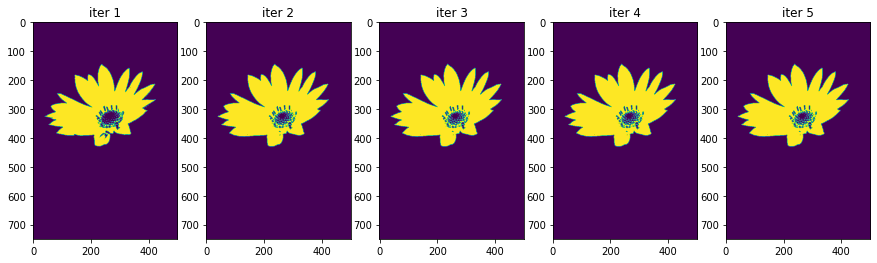

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.imread(imgPath)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#print(img.shape)
result = kMean_clustering_gray(img,2,10)
#disaply first 5
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(result[0])
plt.title("iter 1")
plt.subplot(152), plt.imshow(result[1])
plt.title("iter 2")
plt.subplot(153), plt.imshow(result[2])
plt.title("iter 3")
plt.subplot(154), plt.imshow(result[3])
plt.title("iter 4")
plt.subplot(155), plt.imshow(result[4])
plt.title("iter 5")
plt.show()

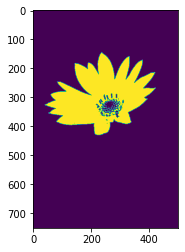

In [ ]:
#last segmentation
plt.imshow(result[9])

apply KMC to grey scale , K=3

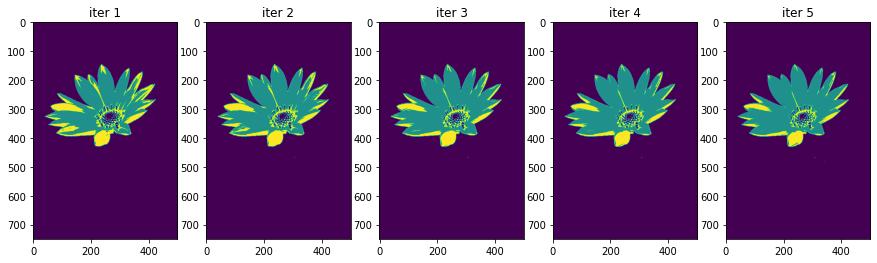

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.imread(imgPath)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#print(img.shape)
result = kMean_clustering_gray(img,3,10)
#disaply first 5
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(result[0])
plt.title("iter 1")
plt.subplot(152), plt.imshow(result[1])
plt.title("iter 2")
plt.subplot(153), plt.imshow(result[2])
plt.title("iter 3")
plt.subplot(154), plt.imshow(result[3])
plt.title("iter 4")
plt.subplot(155), plt.imshow(result[4])
plt.title("iter 5")
plt.show()

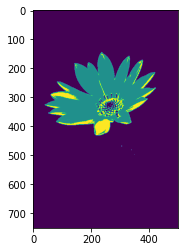

In [ ]:
#last segmentation
plt.imshow(result[9])

according to my observation, the colored images can help the k_mean clustring proform better, since there are more colors to sort and find center of, and gray scale only express the intensity of pixles, therefore some imformations are lost, therefore, the k_mean is harder to defined

Normalized Graph-cut and Mean-shift Segmentation

In [ ]:
#ref tutorial_9
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
#method that impliment the 
def graphCut(img,com=5,seg = 400,tr = 0.001):
  labels1 = segmentation.slic(img, compactness=com, n_segments=seg,start_label=1)
  out1 = color.label2rgb(labels1, img, kind='avg',bg_label=0)
  g = graph.rag_mean_color(img, labels1, mode='similarity')
  labels2 = graph.cut_normalized(labels1, g,thresh=tr)
  out2 = color.label2rgb(labels2, img, kind='avg',bg_label=0)
  return out2.astype(int)#return a interger array

change the value of compactness: higher the compactness value, the more deetiles of the image lost. but the centre are more visiable for the same amount of iteration



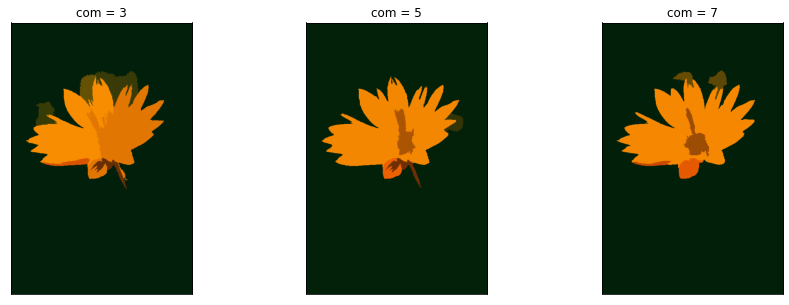

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
com = [3,5,7]#the compactness values that I try
out = []
for i in com:
  out.append(graphCut(img,com = i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("com = 3"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("com = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("com = 7"), plt.xticks([]), plt.yticks([])
plt.show()


change the value of n_seg: better the n_segmentation value is, better the k_mean define the main color parts of images

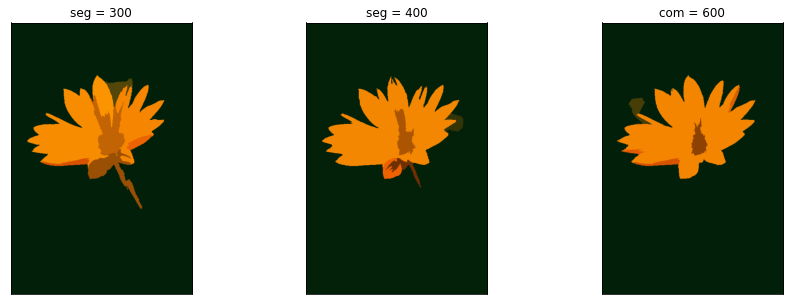

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
seg = [300,400,600]#the compactness values that I try
out = []
for i in seg:
  out.append(graphCut(img,seg = i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("seg = 300"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("seg = 400"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("com = 600"), plt.xticks([]), plt.yticks([])
plt.show()

change the value of thresh: cahnge thresh does't change the result of interation too much

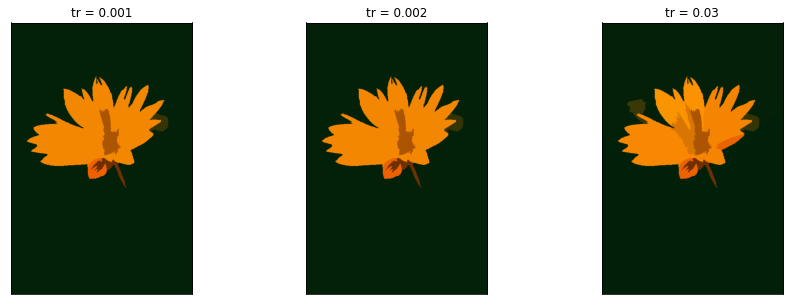

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
tr = [0.001,0.002,0.03]#the compactness values that I try
out = []
for i in tr:
  out.append(graphCut(img,tr = i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("tr = 0.001"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("tr = 0.002"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("tr = 0.03"), plt.xticks([]), plt.yticks([])
plt.show()

Mean-shift Segmentation

In [ ]:
def meanShift(img, mdist = 100,rat = 1.0, ksize = 5):
  label = quickshift(img, ratio = rat, kernel_size = ksize,max_dist=mdist)
  out = color.label2rgb(label, img, kind='avg')
  return out.astype(int)

change the ratio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


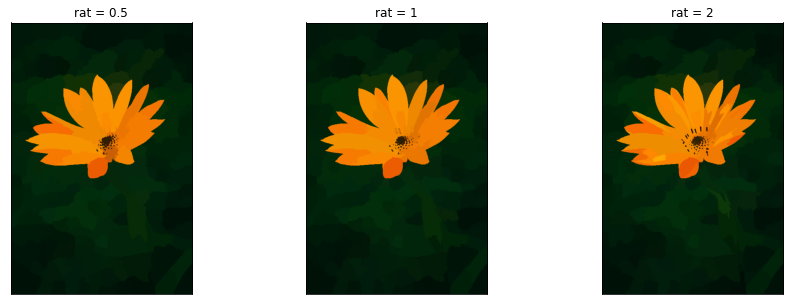

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
rat = [0.5,1,2]#the compactness values that I try
out = []
for i in rat:
  out.append(meanShift(img,rat = i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("rat = 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("rat = 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("rat = 2"), plt.xticks([]), plt.yticks([])
plt.show()

change kernel size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


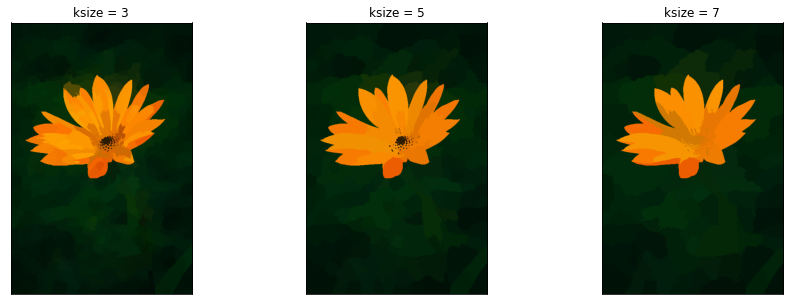

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
ksize = [3,5,7]#the compactness values that I try
out = []
for i in ksize:
  out.append(meanShift(img,ksize = i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("ksize = 3"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("ksize = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("ksize = 7"), plt.xticks([]), plt.yticks([])
plt.show()

change max_dist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


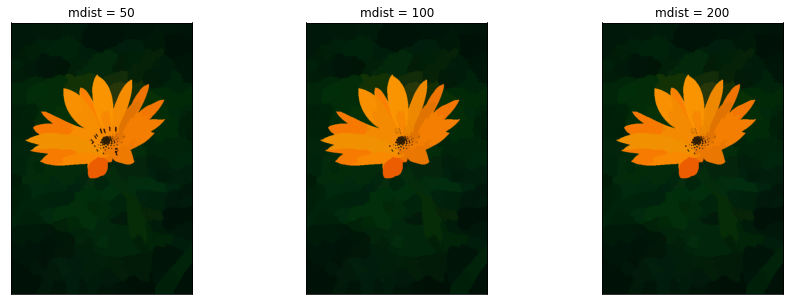

In [ ]:
imgPath = "/content/drive/My Drive/ecse415/assignmentThree/images/flower.jpeg"
img = cv.cvtColor(cv.imread(imgPath), cv.COLOR_BGR2RGB)
mdist = [50,100,200]#the compactness values that I try
out = []
for i in mdist:
  out.append(meanShift(img,mdist= i))
#print(out[0])
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out[0])
plt.title("mdist = 50"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out[1])
plt.title("mdist = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out[2])
plt.title("mdist = 200"), plt.xticks([]), plt.yticks([])
plt.show()

#***Disparity Estimation in Stereo Vision***

In [ ]:
#ref: tutorial 10
#ref: https://github.com/AntonValk/Computer-Vision
imgPathR = "/content/drive/My Drive/ecse415/assignmentThree/images/aloeR.jpg"
imgPathL = "/content/drive/My Drive/ecse415/assignmentThree/images/aloeL.jpg"
imgL = cv.imread(imgPathL);
imgR = cv.imread(imgPathR);
imgL = cv.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv.resize(imgR, None, fx=0.3, fy=0.3)
imgL_gray = cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
imgR_gray = cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)

In [ ]:
#extract 5*5 windows in the left image
#ref: using my own assignment one code for colvolution
def generateBoxPoint(boxSize, CentralPoint):
    result = []
    for j in range(CentralPoint[1]-(int(boxSize/2)),1+CentralPoint[1]+(int(boxSize/2))):
        for i in range(CentralPoint[0]-(int(boxSize/2)),1+CentralPoint[0]+(int(boxSize/2))):
            result.append([i,j])
    return result
def refWindows(image, boxSize):
    result = []
    kernelSize = boxSize
    for j in range(int(kernelSize/2),len(image)-int(kernelSize/2)):
        for i in range(int(kernelSize/2),len(image[0])-int(kernelSize/2)):
            newLine = [] 
            for points in generateBoxPoint(kernelSize,[i,j]):
                #print("points: ",points," ydiff: ",ydiff," xdiff: ",xdiff," image point: ",image[j][i][0])
                newLine.append(image[points[1]][points[0]])
            result.append(np.array(newLine).reshape((boxSize,boxSize)))
    result =  np.array(result,dtype=np.uint8)#result a numpy array with format unit8 inorder to match we input img format
    return result
refWin = refWindows(imgL_gray,5)
print("sucessfully generate reference windows, the size is: ",refWin.shape)

sucessfully generate reference windows, the size is:  (125349, 5, 5)


In [ ]:
def SSD(A,B):#ref: https://stackoverflow.com/questions/2284611/sum-of-square-differences-ssd-in-numpy-scipy
  return np.sum(np.array(A) - (np.array(B)**2))
# For each reference window in the left image do the following
D = np.full((imgL_gray.shape),48)#Set disparity D(i, j) = 48 for these pixel-locations.
#print(D)
#Extract 5×5 windows centered at every pixellocation in this search region for right scanline
#bounded by pixel_location(i,j-47)
rightScanLine = np.delete(imgR_gray,np.s_[imgR_gray.shape[1]-47:],axis=1)
scanLineR = refWindows(rightScanLine,5)
for i in range(refWin.shape[0]):
  currentRefWin = refWin[i]
  #print(scanLineR.shape)
  #Compute sum-of-square-differences (SSD) between the windows in the search region and the reference window.
  SSDs = []
  for j in range(scanLineR.shape[0]):
    SSDs.append(SSD(scanLineR[j],refWin[i]))
  #Find a location (i,j) with minimum SSD and compute disparity
  #print(SSDs)
  theMinj = np.argmin(np.array(SSDs))%imgL_gray.shape[1]
  
  #print(theMinj)
  D[i%imgL_gray.shape[0]][theMinj] = imgL_gray[i%imgL_gray.shape[0]][theMinj] - imgR_gray[i%imgL_gray.shape[0]][theMinj]
D.astype(int)
plt.imshow(D)#issue: too much iteration is needed, cannot see my result

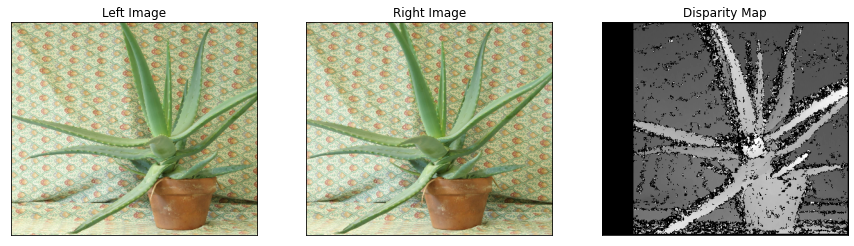

In [ ]:
#ref: tutorial 10
stereo = cv.StereoBM_create(numDisparities=16*3, blockSize=5) #stereo correspondence using the block matching algorithm
disparity = stereo.compute(imgL_gray, imgR_gray)

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity, cmap="gray")
plt.title("Disparity Map"), plt.xticks([]), plt.yticks([])
plt.show()
#code by: kaifan zheng(260962377)
